In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [8]:
# Load your data
file_path = 'C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/suomi24/Data/suomi24_with_hypotheses.csv'
df = pd.read_csv(file_path)
df

,msg_type,datetime,title,thread_id,comment_id,topic_name_top,topic_name_leaf,thread_text,title_processed,thread_text_processed,combined_processed,hypothesis
0,thread_start,10/21/2008 15:10,2008,6382354,0,Groups,40 plus,"but despised and questioned yes. 2008 Well, we...",NaN,but despised and questioned yes well we thoug...,but despised and questioned yes well we thou...,H2
1,comment,10/21/2008 16:34,2008,6382354,33460404,Groups,40 plus,Orwell was a seer. In '84 the world didn't exa...,NaN,orwell was a seer in the world did not exactl...,orwell was a seer in the world did not exact...,H4
2,comment,3/19/2016 9:40,- I don't know. - What's the payoff?,14185813,83782764,Hobbies,Electronics,which did not protect the car owner from the r...,i do not know what is the payoff,which did not protect the car owner from the r...,i do not know what is the payoff which did n...,H1
3,comment,3/25/2016 23:48,- I don't know. - What's the payoff?,14185813,83896363,Hobbies,Electronics,"the cashier will have a ""card reported as miss...",i do not know what is the payoff,the cashier will have a card reported as missi...,i do not know what is the payoff the cashier...,H2
4,comment,4/11/2016 23:06,- I don't know. - What's the payoff?,14185813,84156873,Hobbies,Electronics,but do those only Mastercard Kredit cards with...,i do not know what is the payoff,but do those only mastercard kredit cards with...,i do not know what is the payoff but do thos...,H1
...,...,...,...,...,...,...,...,...,...,...,...,...
217996,comment,3/16/2013 11:54,Localities,11340784,60550054,Localities,Nickel,thank you. Who could make it happen? Camera St...,localities,thank you who could make it happen camera stel...,localities thank you who could make it happen ...,H2
217997,comment,1/16/2015 15:03,Vehicles and transport,13305552,77069109,Vehicles and transport,Public transport,This rave junta now put the lives of possibly ...,vehicles and transport,this rave junta now put the lives of possibly ...,vehicles and transport this rave junta now put...,H0
217998,comment,3/18/2013 13:55,Localities,11340784,60588127,Localities,Nickel,It would be nice to see what's going on there ...,localities,it would be nice to see what is going on there...,localities it would be nice to see what is goi...,H4
217999,comment,3/30/2006 8:55,Localities,2778360,14276358,Localities,Rovaniemi,did not prevent our table from stealing. Its a...,localities,did not prevent our table from stealing its a ...,localities did not prevent our table from stea...,H0


In [9]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def vader_sentiment(text):
    return analyzer.polarity_scores(text)

In [11]:
column = 'thread_text_processed'

In [13]:
tqdm.pandas(desc="Processing")
df['compound'] = df[column].progress_apply(vader_sentiment).progress_apply(lambda x: x['compound'])
# df['compound'] = df['vader_sentiment'].apply(lambda x: x['compound'])
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')

Processing: 100%|██████████| 218001/218001 [00:00<00:00, 1032874.48it/s]


In [5]:
print("Sentiment Counts:\n", df['sentiment'].value_counts())

# print("thread_text_processed_sentiment Counts:\n", df['thread_text_processed_sentiment'].value_counts())
# print("combined_processed_sentiment Counts:\n", df['combined_processed_sentiment'].value_counts())
# print("thread_text_processed_vader_sentiment Counts:\n", df['thread_text_processed_vader_sentiment'].value_counts())
# print("combined_processed_vader_sentiment Counts:\n", df['combined_processed_vader_sentiment'].value_counts())

Sentiment Counts:
 sentiment
positive    100593
negative     91703
neutral      25705
Name: count, dtype: int64


In [15]:
df.to_csv('C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/suomi24/Data/suomi24_final-vader.csv', index=False)

In [4]:
# Load your data
file_path = 'C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/suomi24/Data/suomi24_final-vader.csv'
df = pd.read_csv(file_path)

,msg_type,datetime,title,thread_id,comment_id,topic_name_top,topic_name_leaf,thread_text,title_processed,thread_text_processed,combined_processed,hypothesis,compound,sentiment
0,thread_start,10/21/2008 15:10,2008,6382354,0,Groups,40 plus,"but despised and questioned yes. 2008 Well, we...",NaN,but despised and questioned yes well we thoug...,but despised and questioned yes well we thou...,H2,0.1531,positive
1,comment,10/21/2008 16:34,2008,6382354,33460404,Groups,40 plus,Orwell was a seer. In '84 the world didn't exa...,NaN,orwell was a seer in the world did not exactl...,orwell was a seer in the world did not exact...,H4,-0.2755,negative
2,comment,3/19/2016 9:40,- I don't know. - What's the payoff?,14185813,83782764,Hobbies,Electronics,which did not protect the car owner from the r...,i do not know what is the payoff,which did not protect the car owner from the r...,i do not know what is the payoff which did n...,H1,-0.8249,negative
3,comment,3/25/2016 23:48,- I don't know. - What's the payoff?,14185813,83896363,Hobbies,Electronics,"the cashier will have a ""card reported as miss...",i do not know what is the payoff,the cashier will have a card reported as missi...,i do not know what is the payoff the cashier...,H2,-0.8779,negative
4,comment,4/11/2016 23:06,- I don't know. - What's the payoff?,14185813,84156873,Hobbies,Electronics,but do those only Mastercard Kredit cards with...,i do not know what is the payoff,but do those only mastercard kredit cards with...,i do not know what is the payoff but do thos...,H1,-0.2263,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217996,comment,3/16/2013 11:54,Localities,11340784,60550054,Localities,Nickel,thank you. Who could make it happen? Camera St...,localities,thank you who could make it happen camera stel...,localities thank you who could make it happen ...,H2,0.7964,positive
217997,comment,1/16/2015 15:03,Vehicles and transport,13305552,77069109,Vehicles and transport,Public transport,This rave junta now put the lives of possibly ...,vehicles and transport,this rave junta now put the lives of possibly ...,vehicles and transport this rave junta now put...,H0,-0.2732,negative
217998,comment,3/18/2013 13:55,Localities,11340784,60588127,Localities,Nickel,It would be nice to see what's going on there ...,localities,it would be nice to see what is going on there...,localities it would be nice to see what is goi...,H4,0.5702,positive
217999,comment,3/30/2006 8:55,Localities,2778360,14276358,Localities,Rovaniemi,did not prevent our table from stealing. Its a...,localities,did not prevent our table from stealing its a ...,localities did not prevent our table from stea...,H0,-0.5823,negative


# H0: Personal experiences with surveillance cameras significantly shape people's views on public monitoring.
# H1: Attitudes toward surveillance cameras vary significantly depending on their placement in different settings, such as shopping areas, residential blocks, and workplaces.
# H2: There are common technical complaints about surveillance cameras, and people suggest specific enhancements to address these issues.
# H3: Surveillance cameras make people feel more secure rather than feeling watched.
# H4: There is a noticeable relationship between the density of surveillance cameras in an area and public opinion regarding their presence.

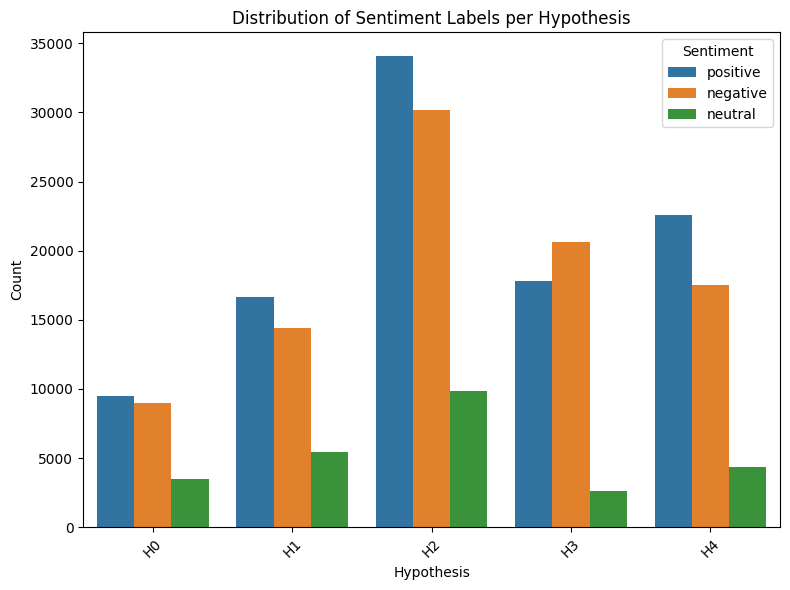

In [16]:
plt.figure(figsize=(8, 6))
color_palette = {'positive': '#1f77b4', 'negative': '#ff7f0e', 'neutral': '#2ca02c'}
sns.countplot(data=df, x='hypothesis', hue='sentiment', order=sorted(df['hypothesis'].unique()), palette=color_palette)
plt.title('Distribution of Sentiment Labels per Hypothesis')
plt.xlabel('Hypothesis')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
# # Display some example rows for each sentiment
# positive_examples = df[df['sentiment'] == 'positive'].sample(10)
# neutral_examples = df[df['sentiment'] == 'neutral'].sample(10)
# negative_examples = df[df['sentiment'] == 'negative'].sample(10)

# print("Positive Examples:\n", positive_examples[[column]])
# print("\nNeutral Examples:\n", neutral_examples[[column]])
# print("\nNegative Examples:\n", negative_examples[[column]])

Positive Examples:
                                     thread_text_processed
188467   ask it out and it was and is only that why do...
2489    the third guard came to congratulate two of hi...
150305  you probably think christmas is santas birthda...
36452   duty  warriors who understood the concepts of ...
146321  thats great good text unlike that one piece of...
78772   as egypt today was acclaiming finnish women so...
27100   and not only some kind of trunks but real fore...
93301   and i think that is a little bit healthier tha...
87707   e h one day a week or if interest is so ask fo...
82870   we had weird things like that when we lived to...

Neutral Examples:
                                     thread_text_processed
116907  could you get the news from the sights of owl ...
197909  not a leisure lounge or a permanent lounge the...
201948  it will be closed sometimes the file will be m...
217913  is that the way to keep going when you are goi...
18915   it is a bit similar to t

In [ ]:
# yearly trend of hypothesis/ evolution
# key and dominant entities occuring in sentiment types
# research the reason of starting point of heated discussions
# evolution of camera implementations/ legislation frameword/ public camera installations / accidents

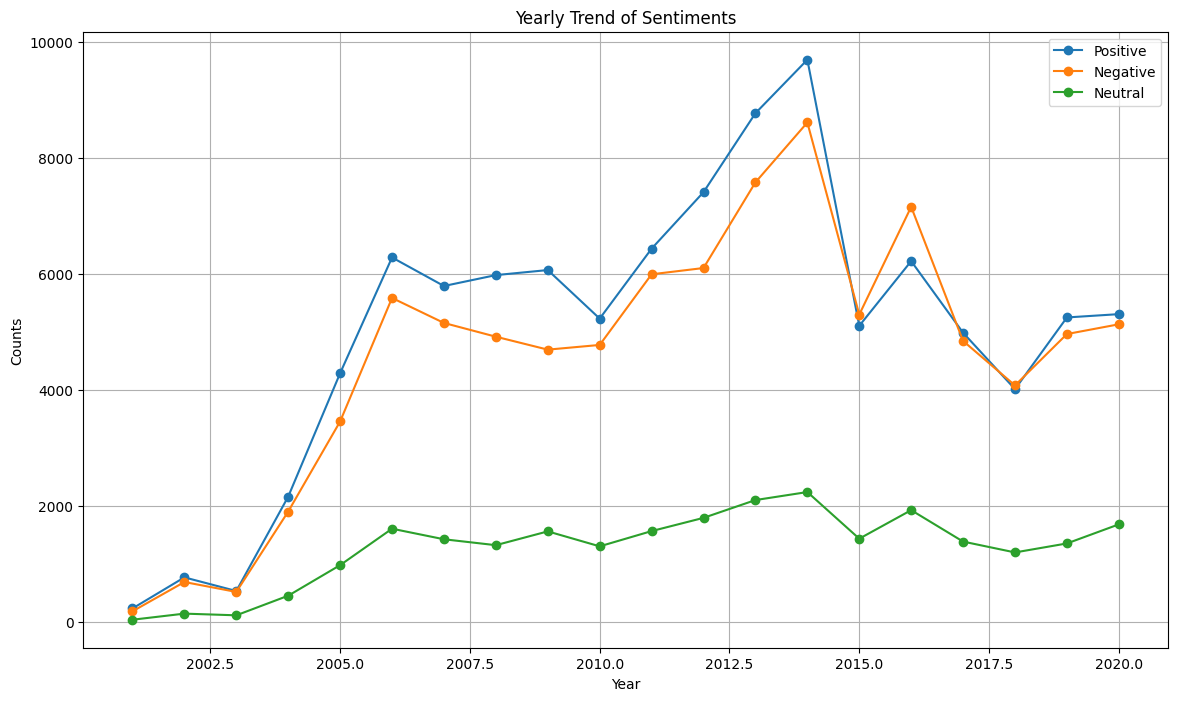

In [21]:
# Filter out rows with hypothesis '-1'
df_filtered = df[df['hypothesis'] != '-1']

# Convert datetime to datetime format and extract year
df_filtered['year'] = pd.to_datetime(df_filtered['datetime']).dt.year

# Group by year and sentiment
yearly_sentiment = df_filtered.groupby(['year', 'sentiment']).size().reset_index(name='counts')

# Pivot the table
yearly_sentiment_pivot = yearly_sentiment.pivot_table(index='year', columns='sentiment', values='counts', fill_value=0)

# Plot yearly trend for all sentiments
plt.figure(figsize=(14, 8))
if 'positive' in yearly_sentiment_pivot.columns:
    plt.plot(yearly_sentiment_pivot.index, yearly_sentiment_pivot['positive'], marker='o', label='Positive')
if 'negative' in yearly_sentiment_pivot.columns:
    plt.plot(yearly_sentiment_pivot.index, yearly_sentiment_pivot['negative'], marker='o', label='Negative')
if 'neutral' in yearly_sentiment_pivot.columns:
    plt.plot(yearly_sentiment_pivot.index, yearly_sentiment_pivot['neutral'], marker='o', label='Neutral')

plt.title('Yearly Trend of Sentiments')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(loc='best')
plt.grid(True)
plt.show()


C:\Users\fahad\AppData\Local\Temp\ipykernel_5872\650171262.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowden_discussions['year'] = snowden_discussions['datetime'].dt.year


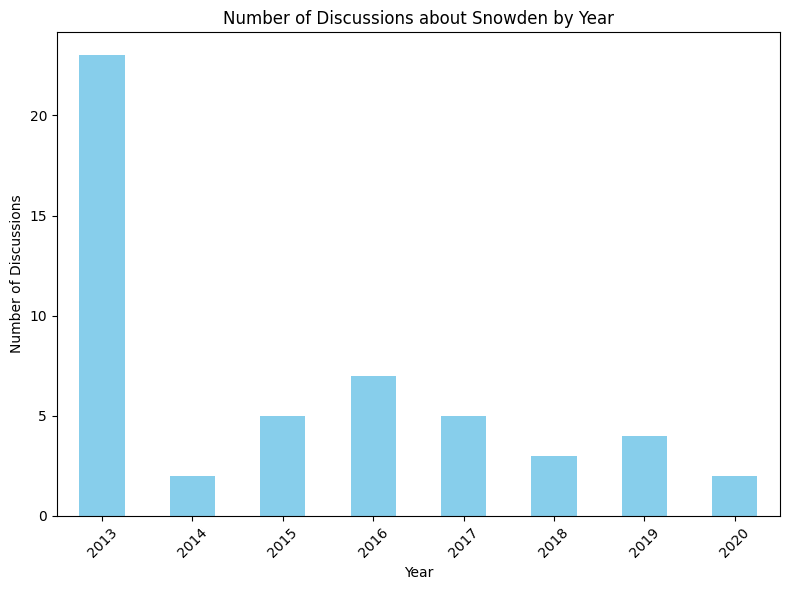

In [17]:
# Ensure your datetime column is parsed as datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Filter for discussions mentioning "Snowden"
snowden_discussions = df[df['thread_text_processed'].str.contains('snowden', case=False, na=False)]

# Extract the year from the datetime column
snowden_discussions['year'] = snowden_discussions['datetime'].dt.year

# Count the number of discussions per year
discussions_per_year = snowden_discussions['year'].value_counts().sort_index()

# Plot the number of discussions per year
plt.figure(figsize=(8, 6))
discussions_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Discussions about Snowden by Year')
plt.xlabel('Year')
plt.ylabel('Number of Discussions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


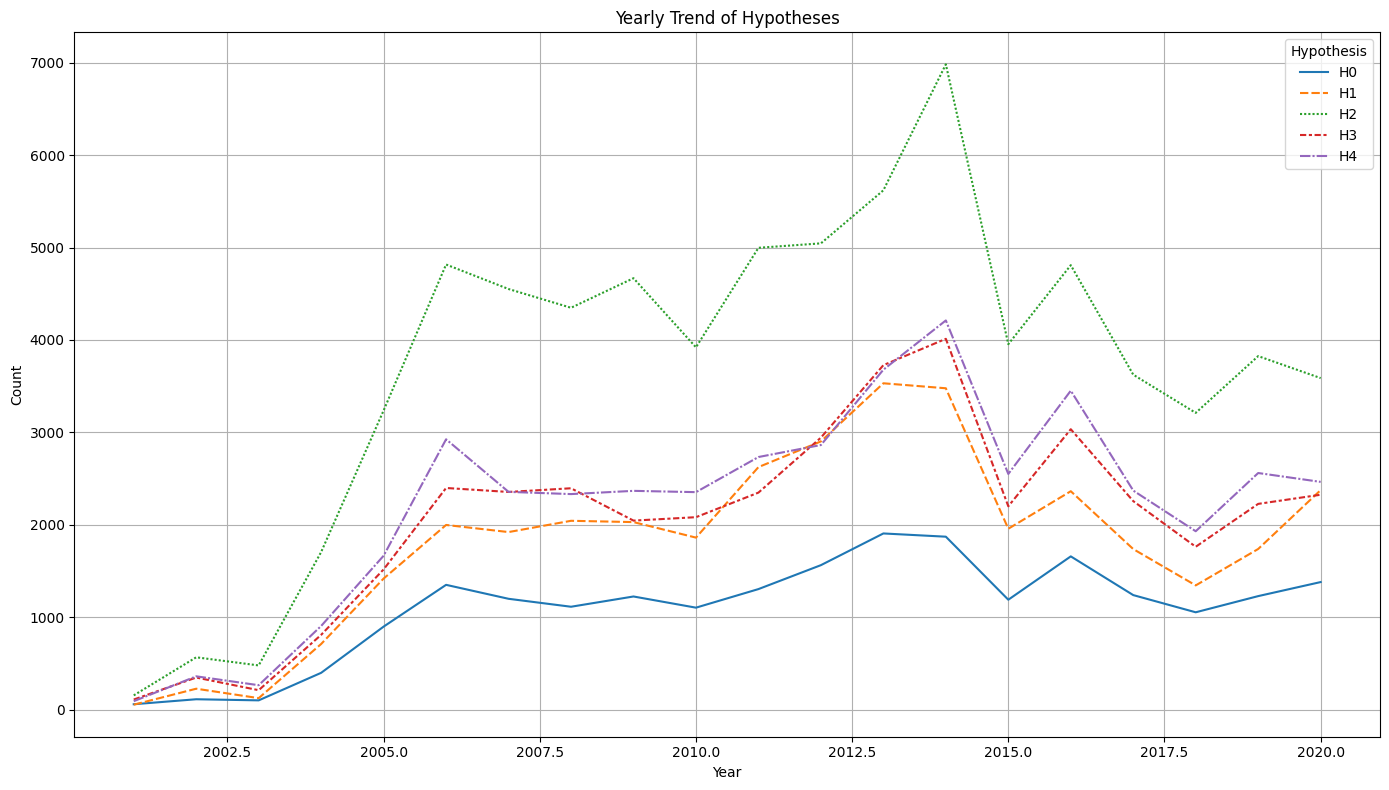

In [22]:
# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the year from the 'datetime' column
df['year'] = df['datetime'].dt.year

# Count the occurrences of each hypothesis per year
yearly_hypothesis_counts = df.groupby(['year', 'hypothesis']).size().reset_index(name='counts')

# Pivot the table to get hypotheses as columns
yearly_hypothesis_pivot = yearly_hypothesis_counts.pivot(index='year', columns='hypothesis', values='counts').fillna(0)

# Plot the yearly trend of each hypothesis
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_hypothesis_pivot)
plt.title('Yearly Trend of Hypotheses')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Hypothesis', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


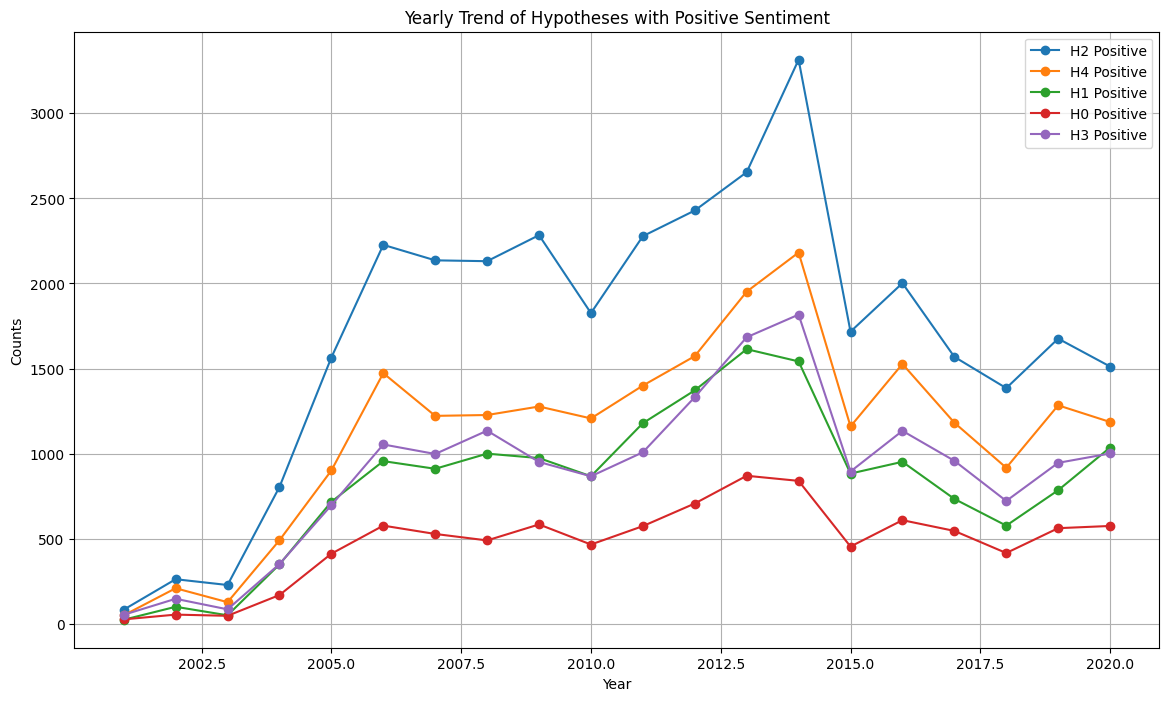

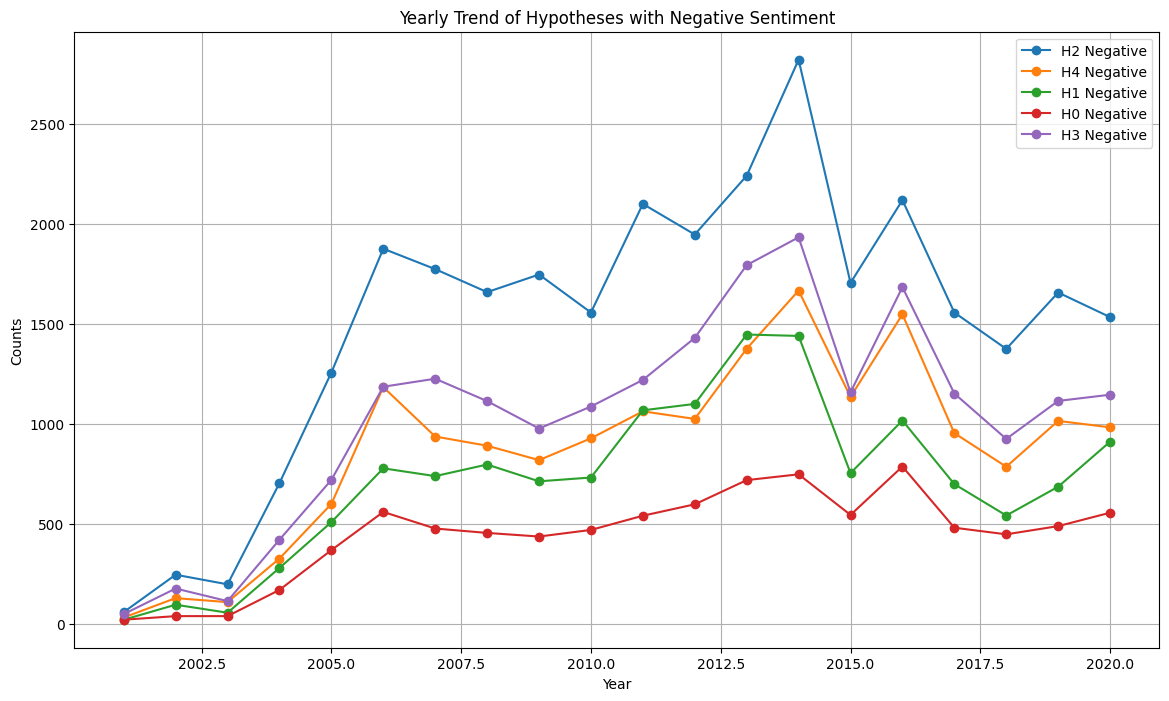

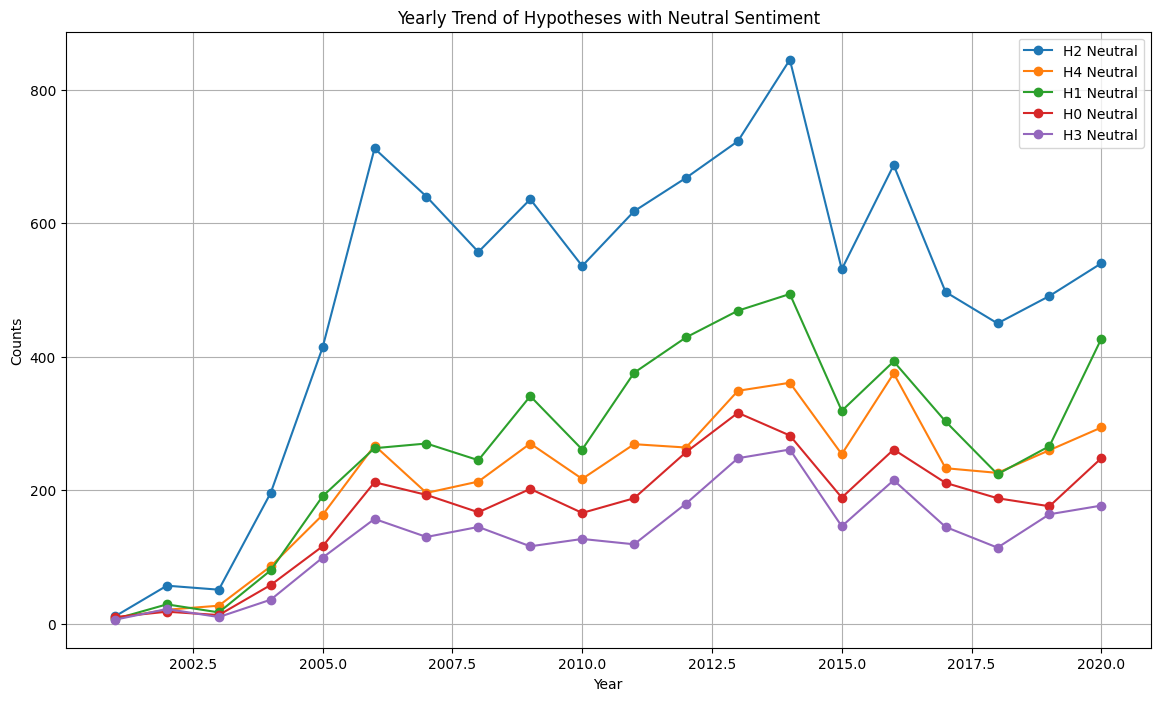

In [23]:
# Filter out rows with hypothesis '-1'
df_filtered = df[df['hypothesis'] != '-1']

# Convert datetime to datetime format and extract year
df_filtered['year'] = pd.to_datetime(df_filtered['datetime']).dt.year

# Group by year, hypothesis, and sentiment
yearly_hypothesis_sentiment = df_filtered.groupby(['year', 'hypothesis', 'sentiment']).size().reset_index(name='counts')

# Pivot the table
yearly_hypothesis_sentiment_pivot = yearly_hypothesis_sentiment.pivot_table(index='year', columns=['hypothesis', 'sentiment'], values='counts', fill_value=0)

# Plot positive sentiment
plt.figure(figsize=(14, 8))
for hypothesis in df_filtered['hypothesis'].unique():
    if 'positive' in yearly_hypothesis_sentiment_pivot[hypothesis].columns:
        plt.plot(yearly_hypothesis_sentiment_pivot.index, yearly_hypothesis_sentiment_pivot[hypothesis]['positive'], marker='o', label=f'{hypothesis} Positive')

plt.title('Yearly Trend of Hypotheses with Positive Sentiment')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot negative sentiment
plt.figure(figsize=(14, 8))
for hypothesis in df_filtered['hypothesis'].unique():
    if 'negative' in yearly_hypothesis_sentiment_pivot[hypothesis].columns:
        plt.plot(yearly_hypothesis_sentiment_pivot.index, yearly_hypothesis_sentiment_pivot[hypothesis]['negative'], marker='o', label=f'{hypothesis} Negative')

plt.title('Yearly Trend of Hypotheses with Negative Sentiment')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot neutral sentiment
plt.figure(figsize=(14, 8))
for hypothesis in df_filtered['hypothesis'].unique():
    if 'neutral' in yearly_hypothesis_sentiment_pivot[hypothesis].columns:
        plt.plot(yearly_hypothesis_sentiment_pivot.index, yearly_hypothesis_sentiment_pivot[hypothesis]['neutral'], marker='o', label=f'{hypothesis} Neutral')

plt.title('Yearly Trend of Hypotheses with Neutral Sentiment')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(loc='best')
plt.grid(True)
plt.show()


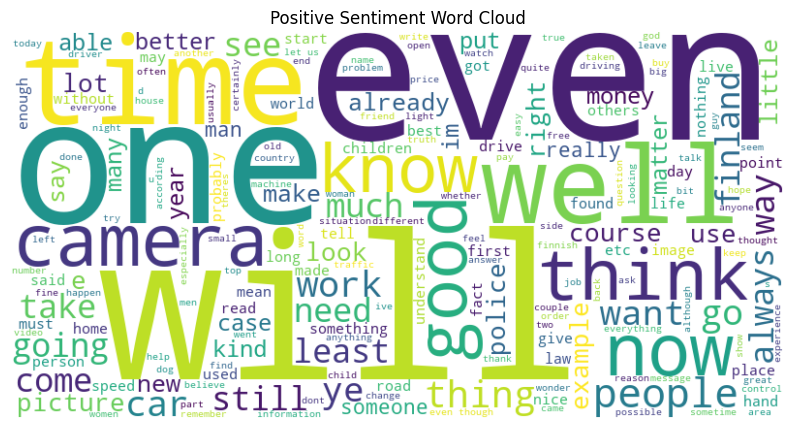

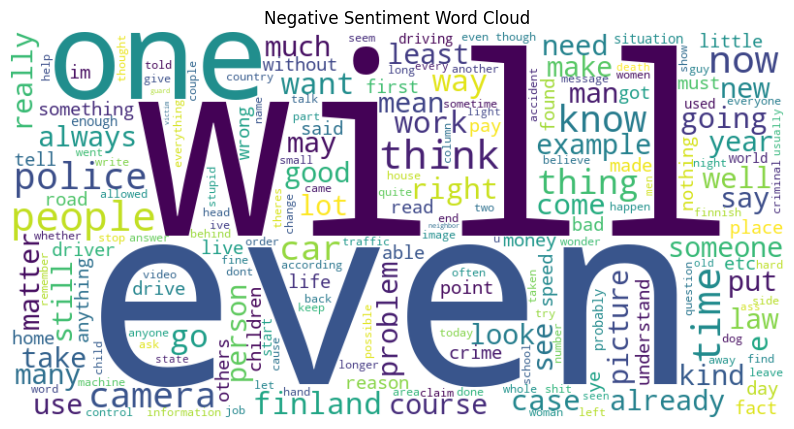

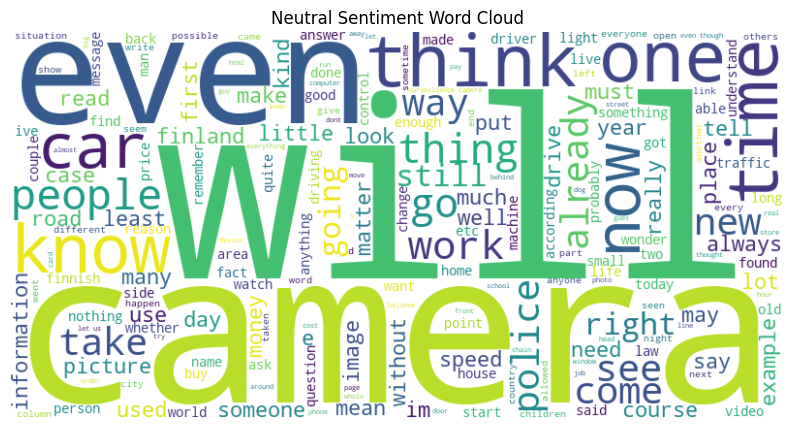

In [24]:
# Generate word clouds for each sentiment type
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Filter the texts by sentiment
positive_text = df[df['sentiment'] == 'positive'][column]
negative_text = df[df['sentiment'] == 'negative'][column]
neutral_text = df[df['sentiment'] == 'neutral'][column]

# Generate word clouds
generate_word_cloud(positive_text, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_text, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_text, 'Neutral Sentiment Word Cloud')


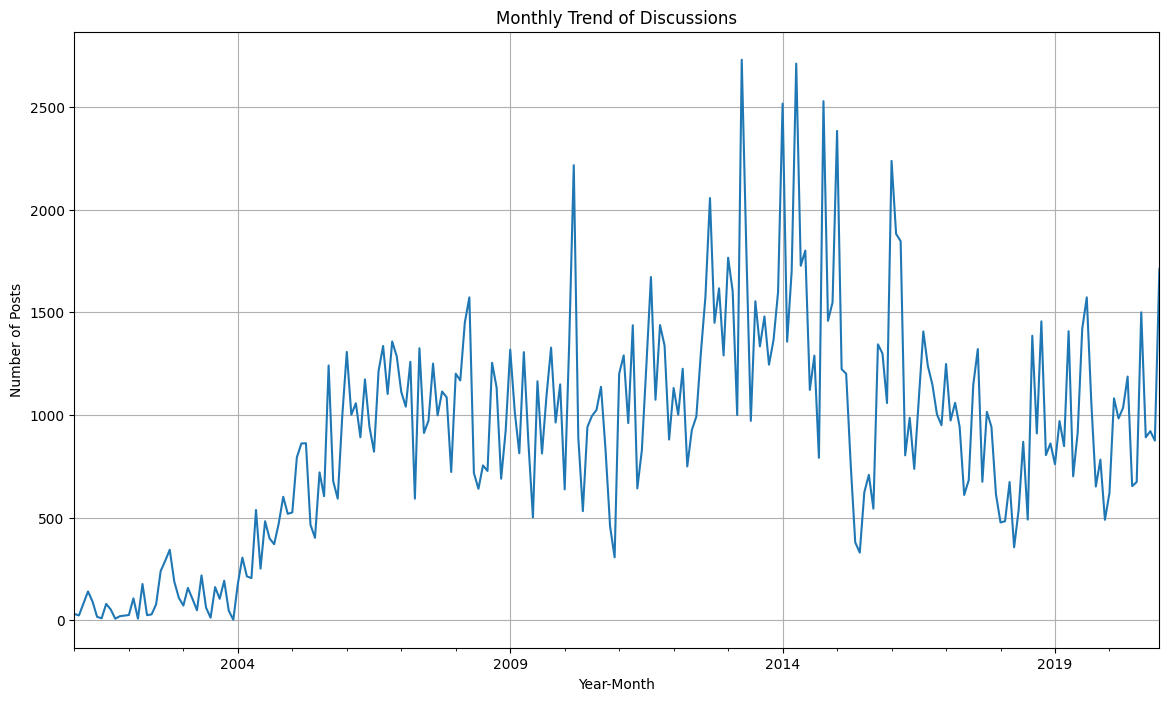

Top 10 months with highest increase in posts:
year_month
2014-10    1738.0
2013-04    1732.0
2016-01    1180.0
2014-04    1011.0
2014-01     918.0
2018-08     896.0
2011-01     895.0
2010-03     860.0
2020-12     837.0
2015-01     836.0
Freq: M, Name: count, dtype: float64


In [25]:
# Group by year and month to see trends over time
df['year_month'] = pd.to_datetime(df['datetime']).dt.to_period('M')
monthly_counts = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
monthly_counts.plot()
plt.title('Monthly Trend of Discussions')
plt.xlabel('Year-Month')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

# Find months with the highest increase in posts
monthly_counts_diff = monthly_counts.diff().dropna()
top_increases = monthly_counts_diff.nlargest(10)

print("Top 10 months with highest increase in posts:")
print(top_increases)
